In [1]:
import os
from os.path import expanduser
import socket
import sys
import glob

# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemOLLIE = 'ollie0'
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
if running_system == systemLOCAL:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"Documents","projects", "pyfesom")
elif running_system[0:1] == "b" or running_system == systemHLRN  or running_system == systemOLLIE:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"pyfesom")
else:
    print 'please configure your local machine : type socket.gethostname()'
print "working directory set to", wd_path
os.chdir(wd_path)
sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append("pyfesom") # add standard 's modules
#########################################

computer =  ollie0
working directory set to /home/ollie/loziel/pyfesom


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from pylab import *
import pyfesom as pf
#from load_mesh_data_new import *
import numpy as np
import datetime as dt
from PiecewiseNorm import PiecewiseNorm
from netCDF4 import Dataset
#import cmocean as cmaps
from matplotlib.colors import ListedColormap
import colormaps as cmaps

no cmocean


In [3]:
import shapefile as shp
sf = shp.Reader('/home/ollie/loziel/wwf/wwf_epsg4326.shp')

/global/AWIsoft/intel/2018/intelpython2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


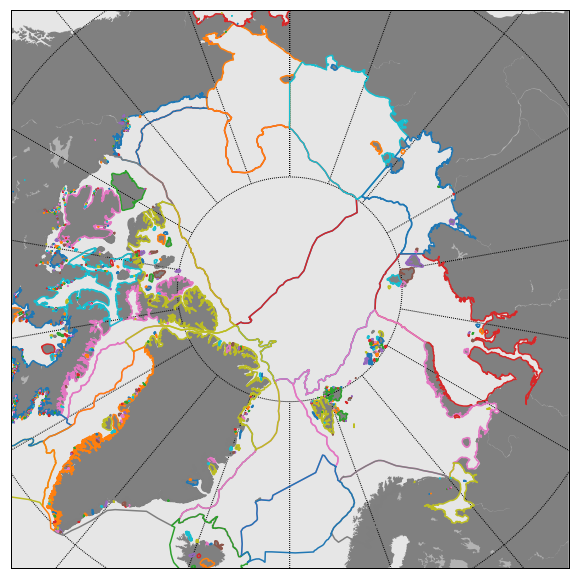

In [4]:
fig = plt.figure(figsize=(10, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(wspace=0.02,hspace=0.02)

map = Basemap(projection='nplaea',boundinglat=65,lon_0=0,resolution='l')
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
map.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
map.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
map.drawmapboundary(fill_color='0.9')
map.fillcontinents(color='.5',lake_color='.7')

for shape in sf.shapeRecords():
    if shape.record[1] <= 50:
        for i in range(len(shape.shape.parts[:])):
            i_start = shape.shape.parts[i]
            if i==len(shape.shape.parts)-1:
                i_end = len(shape.shape.points)
            else:
                i_end = shape.shape.parts[i+1]
            x = [i[0] for i in shape.shape.points[i_start:i_end]]
            y = [i[1] for i in shape.shape.points[i_start:i_end]]
            lon, lat = map(x, y)
            plt.plot(lon,lat)

plt.show()

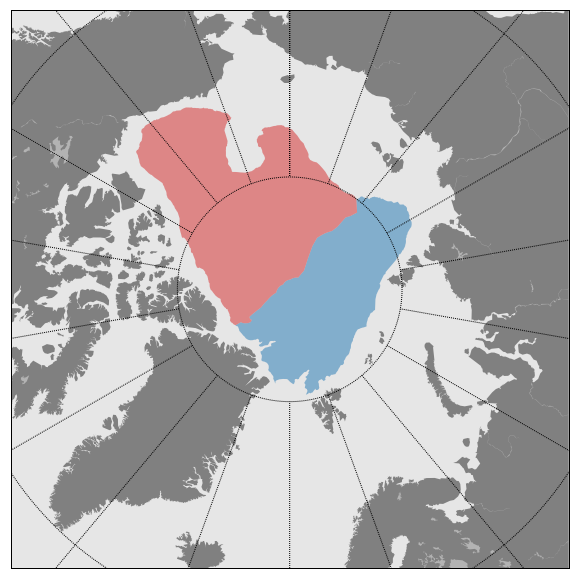

In [7]:
fig = plt.figure(figsize=(10, 15), facecolor='w', edgecolor='k')
#fig.subplots_adjust(wspace=0.02,hspace=0.02)
ax      = fig.add_subplot(111)

map = Basemap(projection='nplaea',boundinglat=65,lon_0=0,resolution='l')
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
map.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
map.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
map.drawmapboundary(fill_color='0.9')
map.fillcontinents(color='.5',lake_color='.7')

for shape in sf.shapeRecords():
    if shape.record[1] <= 25:
        for i in range(len(shape.shape.parts[:])):
            i_start = shape.shape.parts[i]
            if i==len(shape.shape.parts)-1:
                i_end = len(shape.shape.points)
            else:
                i_end = shape.shape.parts[i+1]
            x = [i[0] for i in shape.shape.points[i_start:i_end]]
            y = [i[1] for i in shape.shape.points[i_start:i_end]]
            lon, lat = map(x, y)
            #plt.plot(lon,lat)
            poly = Polygon(list(zip(lon, lat)))
            #ax.add_patch(PolygonPatch(poly, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2 ))
            plt.fill(lon, lat, alpha=0.5, zorder=2)

plt.show()